<a href="https://colab.research.google.com/github/marcovirulucas/APIs-beta-/blob/main/united_states/BLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bureau of Labor Statistics API with Python
## Consumer Price Index (Year-Over-Year % Change) Series
------
*February 27, 2026*\
\
The documentation about BLS API can be found [here](https://www.bls.gov/developers/).\
\
This script collects data on some series of the Consumer Price Index (Year-Over-Year % Change)

In [ ]:
import pandas as pd
import requests
import json
import numpy as np

In [ ]:
api_url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
import keys
key = '{}'.format(keys.bls_key)

In [ ]:
# Store series a dictionary
series_dict = {
    'CUUR0000SA0': 'All items',
    'CUUR0000SAF1': 'Food',
    'CUUR0000SA0E': 'Energy',
    'CUUR0000SA0L1E': 'All items less food and energy'}

# Start year and end year
date_r = (2000, 2026)

# Handle dates
dates = [(str(date_r[0]), str(date_r[1]))]
while int(dates[-1][1]) - int(dates[-1][0]) > 10:
    dates = [(str(date_r[0]), str(date_r[0]+9))]
    d1 = int(dates[-1][0])
    while int(dates[-1][1]) < date_r[1]:
        d1 = d1 + 10
        d2 = min([date_r[1], d1+9])
        dates.append((str(d1),(d2)))

In [ ]:
dates

[('2000', '2009'), ('2010', 2019), ('2020', 2026)]

In [ ]:
df = pd.DataFrame()

for start, end in dates:
    # Submit the list of series as data
    headers={'Content-type': 'application/json'}
    data = json.dumps({
        "registrationKey": key,
        "seriesid": list(series_dict.keys()),
        "startyear": start,
        "endyear": end,
        "calculations":"true"
    })
    # Make a POST request to an URL
    response = requests.post(
        api_url,
        headers=headers,
        data=data)
    # Store the JSON data in a dictionary format
    result = response.json()
    # Construct the dataframe
    for s in result['Results']['series']:
        col = series_dict[s['seriesID']]
        for r in s['data']:
            date = pd.to_datetime('{} {}'.format(r['periodName'], r['year']))
            value = r.get('calculations', {}).get('pct_changes', {}).get('12')
            if value is None or value == '-':
                df.at[date, col] = np.nan
            else:
                df.at[date, col] = float(value)

df = df.sort_index()

# Show results
print('Post Request Status: {}'.format(response.status_code))
df.tail()

Post Request Status: 200


,All items,Food,Energy,All items less food and energy
2025-09-01,3.0,3.1,2.8,3.0
2025-10-01,NaN,NaN,NaN,NaN
2025-11-01,2.7,2.6,4.2,2.6
2025-12-01,2.7,3.1,2.3,2.6
2026-01-01,2.4,2.9,-0.1,2.5


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
plt.rc('axes', edgecolor='white', axisbelow=True)

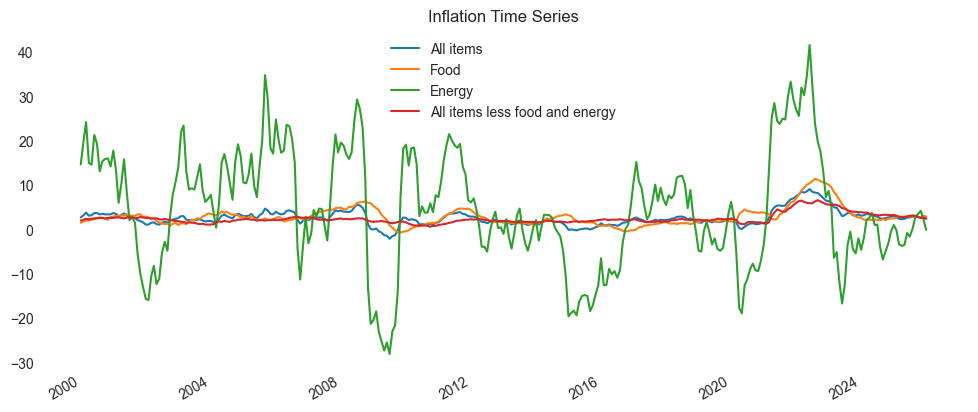

In [ ]:
df.dropna().plot(figsize=(12, 5))
plt.title('Inflation Time Series')
plt.show()